## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [0]:
import tensorflow as tf
import numpy as np
import keras

tf.set_random_seed(42)

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [224]:
print ("x_train length: ", len(x_train))
print ("y_train length: ", len(y_train))
print ("x_train shape: ", x_train.shape)
print ("y_train shape: ", y_train.shape)

x_train length:  60000
y_train length:  60000
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [225]:
print ("x_test length: ", len(x_test))
print ("y_test length: ", len(y_test))
print ("x_test shape: ", x_test.shape)
print ("y_test shape: ", y_test.shape)

x_test length:  10000
y_test length:  10000
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Observations:
#### There are 60000 train samples and 10000 test samples.

### Find dimensions of an image in the dataset

In [226]:
x_train[0].shape

(28, 28)

### Observations:

#### The images are of grayscale with 28 * 28 dimension.

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [227]:
print ("y_train, before one hot vectors conversion")
y_train[0:5]

y_train, before one hot vectors conversion


array([9, 0, 0, 3, 0], dtype=uint8)

In [0]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [229]:
print ("y_train, after one hot vectors conversion")
y_train[0:5,:]

y_train, after one hot vectors conversion


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [230]:
print ("x_train, before normalization")
x_train[11,:1]

x_train, before normalization


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  39, 111,  93,  85,  27,   0,   0,   0,   0,   0,   1,   0,
          0,   0]], dtype=uint8)

In [0]:
x_train_std = x_train/255
x_test_std = x_test/255

In [232]:
print ("x_train, after normalization")
x_train_std[11,:1]

x_train, after normalization


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.15294118,
        0.43529412, 0.36470588, 0.33333333, 0.10588235, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        ]])

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_std = x_train_std.reshape(x_train_std.shape[0], 28, 28, 1).astype('float32')
x_test_std = x_test_std.reshape(x_test_std.shape[0], 28, 28, 1).astype('float32')

In [234]:
print ("x_train, after reshape")
x_train_std[11,:1]

x_train, after reshape


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.15294118],
        [0.43529412],
        [0.3647059 ],
        [0.33333334],
        [0.10588235],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ]]], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import adam

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [236]:
# Define model
model = Sequential()

# 1st Conv Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

# 2nd Conv Layer
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

# Prediction Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model.fit(x_train_std, y_train, batch_size=20, nb_epoch=10, validation_data=(x_test_std, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 31s 517us/step - loss: 0.3578 - acc: 0.8698 - val_loss: 0.2923 - val_acc: 0.8927
Epoch 2/10
60000/60000 [==============================] - 30s 492us/step - loss: 0.2192 - acc: 0.9188 - val_loss: 0.2475 - val_acc: 0.9100
Epoch 3/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.1548 - acc: 0.9425 - val_loss: 0.2454 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.1025 - acc: 0.9619 - val_loss: 0.2876 - val_acc: 0.9113
Epoch 5/10
60000/60000 [==============================] - 29s 491us/step - loss: 0.0661 - acc: 0.9761 - val_loss: 0.3137 - val_acc: 0.9163
Epoch 6/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.0444 - acc: 0.9830 - val_loss: 0.4105 - val_acc: 0.9089
Epoch 7/10
60000/60000 [==============================] - 29s 489us/step - loss: 0.0331 - acc: 0.9881 - val_loss: 0.

### Observations:
#### We have got train accuracy as 99.33 and test accuracy as 91.11
#### It is cleary visible that the model is getting overfitted. The difference between train and test accuracy is more (train acc > test acc)
#### We can try to generalize the model by introducing dropout and max pooling.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [237]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train_std, y_train, batch_size=20, nb_epoch=10, validation_data=(x_test_std, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.3810 - acc: 0.8621 - val_loss: 0.2868 - val_acc: 0.8964
Epoch 2/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.2492 - acc: 0.9071 - val_loss: 0.2512 - val_acc: 0.9076
Epoch 3/10
60000/60000 [==============================] - 26s 432us/step - loss: 0.2030 - acc: 0.9228 - val_loss: 0.2409 - val_acc: 0.9146
Epoch 4/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.1681 - acc: 0.9374 - val_loss: 0.2349 - val_acc: 0.9153
Epoch 5/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.1401 - acc: 0.9467 - val_loss: 0.2278 - val_acc: 0.9218
Epoch 6/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.1172 - acc: 0.9553 - val_loss: 0.2375 - val_acc: 0.9218
Epoch 7/10
60000/60000 [==============================] - 26s 434us/step - loss: 0.1011 - acc: 0.9615 - val_loss: 0.

## Observations:
### Even after adding dropout and maxpooling the model seems to overfit. 
### We can introduce further more dropout and maxpool layers or we can augment the data to train the model with more variations.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train_std)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

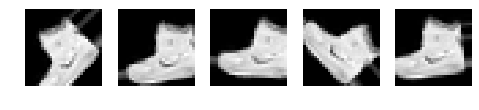

In [239]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_std[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [240]:
history = model2.fit_generator(generator=datagen.flow(x_train_std, y_train, batch_size=20), steps_per_epoch=20, epochs=10, validation_data=(x_test_std, y_test), callbacks=callback_list)

Epoch 1/10
20/20 [==============================] - 1s 74ms/step - loss: 2.5125 - acc: 0.4625 - val_loss: 0.4815 - val_acc: 0.8357
Epoch 2/10
20/20 [==============================] - 1s 70ms/step - loss: 1.5878 - acc: 0.4525 - val_loss: 0.5191 - val_acc: 0.8011
Epoch 3/10
20/20 [==============================] - 1s 69ms/step - loss: 1.3106 - acc: 0.5050 - val_loss: 0.4083 - val_acc: 0.8458
Epoch 4/10
20/20 [==============================] - 1s 70ms/step - loss: 1.2780 - acc: 0.5350 - val_loss: 0.4233 - val_acc: 0.8409
Epoch 5/10
20/20 [==============================] - 1s 69ms/step - loss: 1.1934 - acc: 0.5625 - val_loss: 0.4333 - val_acc: 0.8424
Epoch 6/10
20/20 [==============================] - 1s 70ms/step - loss: 1.1229 - acc: 0.5825 - val_loss: 0.4024 - val_acc: 0.8597
Epoch 7/10
20/20 [==============================] - 1s 69ms/step - loss: 1.1001 - acc: 0.6175 - val_loss: 0.4234 - val_acc: 0.8454
Epoch 8/10
20/20 [==============================] - 1s 68ms/step - loss: 0.9970 - a

###  Report the final train and validation accuracy

In [241]:
loss_and_metrics = model2.evaluate(x_test_std, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 92us/step
[0.41398720288276675, 0.855]


In [242]:
print ("Final Train Accuracy from model history: ", history.history['acc'][-1])
print ("Final Test Accuracy from model history: ", history.history['val_acc'][-1])

Final Train Accuracy from model history:  0.6374999970197678
Final Test Accuracy from model history:  0.85499999833107


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


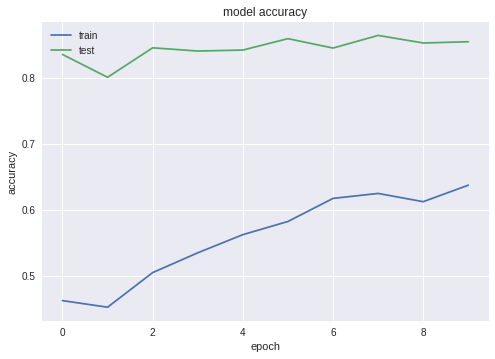

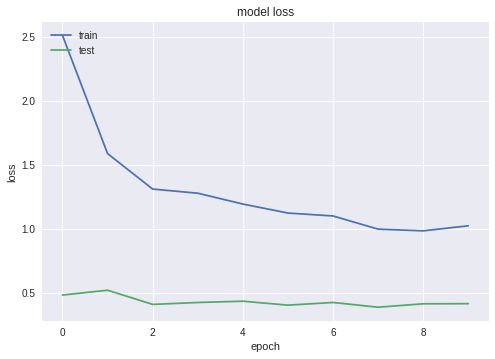

In [243]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Observations:
### Now the model seems to generalize as we have augmentated the data.
### The model can be improved even more by introducing more Conv and deep layers

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Necessary libraries got imported already...

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [246]:
print ("x_train shape: ", x_train.shape)
print ("y_train shape: ", y_train.shape)
print ("x_test shape: ", x_test.shape)
print ("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# Lets normalize the x_train before data augmentation...
x_train_std = x_train/255
x_train_std = x_train_std.astype('float32')

In [0]:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

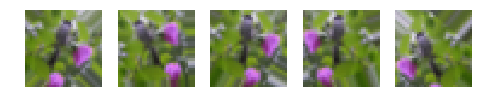

In [250]:
gen = data_gen.flow(x_train_std[300:301], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()